In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
amazon = pd.read_csv('Amazon Sales data.csv')
amazon.head() 

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
amazon.shape

(100, 14)

# Data Cleaning and Manipulation

In [4]:
# checking nulls
amazon.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

- No nulls in our dataset

In [5]:
# checking duplicates
amazon.duplicated().sum()

0

- No duplicates in our dataset

In [6]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


- Ship Date and order date should be Date column
- Let's convert them to a date column

In [7]:
amazon['Order Date'].head()

0    5/28/2010
1    8/22/2012
2     5/2/2014
3    6/20/2014
4     2/1/2013
Name: Order Date, dtype: object

In [8]:
# converting Order Date to datetime
amazon['Order Date'] = pd.to_datetime(amazon['Order Date'], format='mixed')
amazon['Order Date'].dtype

dtype('<M8[ns]')

In [9]:
# converting ship date to dataetime
amazon['Ship Date'] = pd.to_datetime(amazon['Ship Date'], format='mixed')
amazon['Ship Date'].dtype

dtype('<M8[ns]')

- Checking the value counts of each column

In [11]:
for col in amazon.columns:
    print(amazon[col].value_counts().head(10),'\n')

Region
Sub-Saharan Africa                   36
Europe                               22
Australia and Oceania                11
Asia                                 11
Middle East and North Africa         10
Central America and the Caribbean     7
North America                         3
Name: count, dtype: int64 

Country
The Gambia               4
Sierra Leone             3
Sao Tome and Principe    3
Mexico                   3
Australia                3
Djibouti                 3
Switzerland              2
Myanmar                  2
Norway                   2
Turkmenistan             2
Name: count, dtype: int64 

Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Name: count, dtype: int64 

Sales Channel
Offline    50
Online     50
Name: count, dtype: int64 

Order Priority
H    30
L    27
C    22
M    21
Name

# Univariate Analysis

- Dividing Numerical columns and Categorical Columns

In [55]:
# checking whether all the orderIds are unoque or not
amazon['Order ID'].nunique() == amazon.shape[0]

True

- We have all the order Ids unique in our dataset. It's like a primary key in our table

In [28]:
num_col = []
cat_col = []
for i in amazon.columns:
    if amazon[i].nunique() > 30:
        num_col.append(i)
    else:
        cat_col.append(i)

In [29]:
num_col

['Country',
 'Order Date',
 'Order ID',
 'Ship Date',
 'Units Sold',
 'Total Revenue',
 'Total Cost',
 'Total Profit']

In [30]:
cat_col

['Region',
 'Item Type',
 'Sales Channel',
 'Order Priority',
 'Unit Price',
 'Unit Cost']

- Country is a categorical column but here in our dataset we have only 100 rows of data. 
- There are 76 different countries present in our dataset.
- Hence, neither we can keep it in numerical column nor in categorical column. 
- Also, Order ID, Dates column are also not numerical in nature since we can't perform any statistical analysis on these.
- Unit Price and Unit Cost is a numerical column, let's put it in num_col list

In [31]:
# removing 'country' from num_col list
num_col.pop(0)

'Country'

In [35]:
# removing 'order ID', 'Order Date' and 'Ship Date' from num_col list
num_col.pop(0) # order Date
num_col.pop(0) # Order id
num_col.pop(0) # ship date

'Ship Date'

In [225]:
# pushing 'Unit Price ad Unit cost' to num_col
num_col.append(cat_col.pop(-1))
num_col.append(cat_col.pop(-1))

In [226]:
num_col

['Units Sold',
 'Total Revenue',
 'Total Cost',
 'Total Profit',
 'Unit Cost',
 'Unit Price']

- Checking for outliers/anomalies in numerical columns

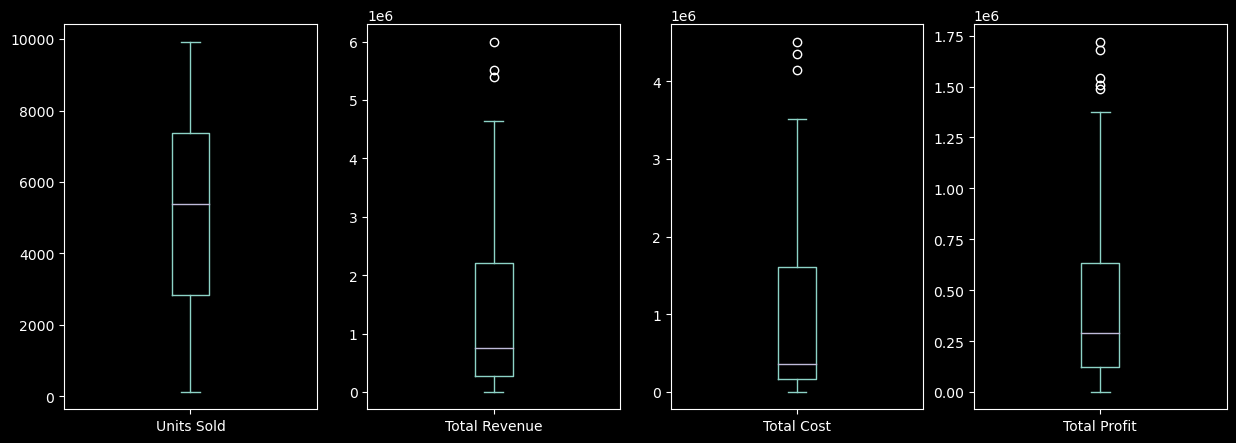

In [54]:
plt.style.use('dark_background')
plt.figure(figsize=(15,5))
for i,col in enumerate(num_col):
    plt.subplot(1,4,i+1)
    amazon[col].plot.box()  

- There are no significant outliers as such in all of numerical columns 

- Let's check the max and min date of date columns 

In [66]:
print(amazon['Order Date'].min().date(), 'to', amazon['Order Date'].max().date())

2010-02-02 to 2017-05-22


- Date range for our amazon dataset is from **2nd Feb, 2010** to **22nd May, 2022** i.e. 12 years

- Now let's explore categorical columns

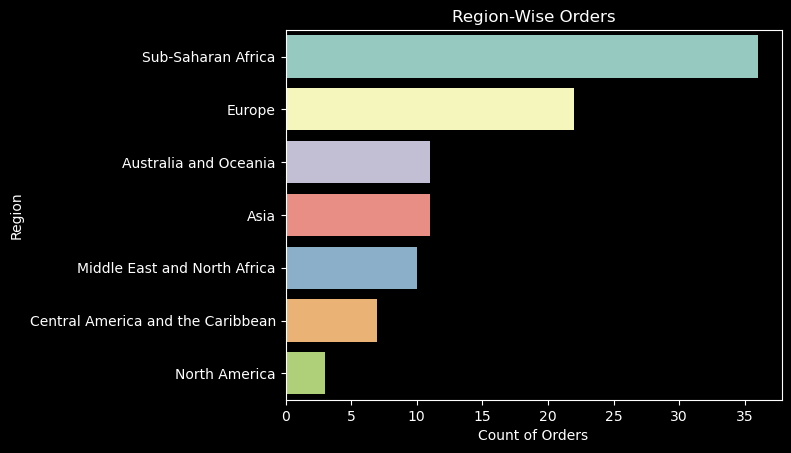

In [115]:
# region column count plot
sns.countplot(data= amazon, y= 'Region', order = amazon.Region.value_counts().index)
plt.title('Region-Wise Orders')
plt.xlabel('Count of Orders')
plt.show()

- We have most number of orders from Sub-Saharan Africa Region followed by Europe

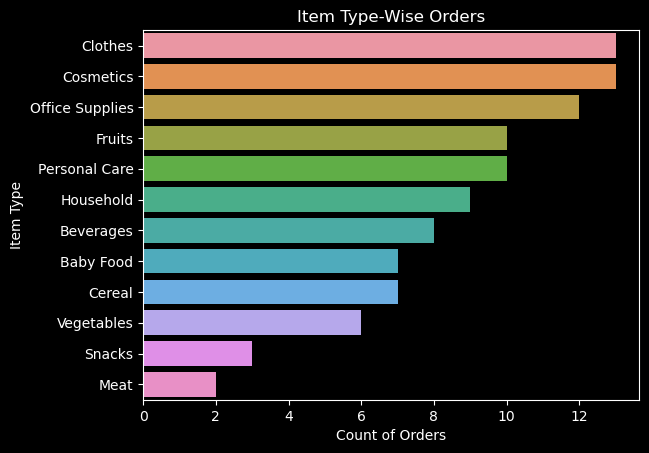

In [114]:
# Item Type column count plot
sns.countplot(data= amazon, y= 'Item Type', order = amazon['Item Type'].value_counts().index)
plt.title('Item Type-Wise Orders')
plt.xlabel('Count of Orders')
plt.show()

- We have most number of Clothes and cosmetics orders followed by office supplies

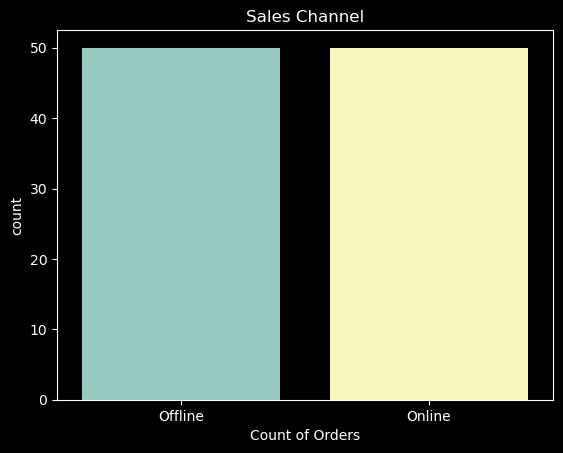

In [83]:
# Sales channel column count plot
sns.countplot(data= amazon, x = 'Sales Channel')
plt.title('Sales Channel')
plt.xlabel('Count of Orders')
plt.show()

- We have two types of sales channel --> Offline and Online
- Both the sales channel have equal number of orders in our dataset. 

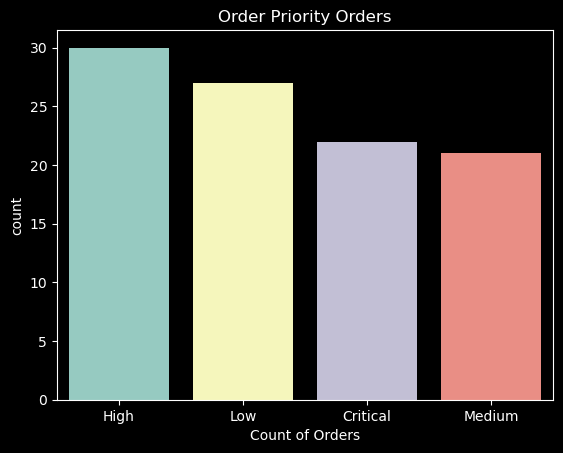

In [111]:
# Order Priority column count plot
labels=['High', 'Low', 'Critical', 'Medium']
sns.countplot(data= amazon, x = 'Order Priority', order = amazon['Order Priority'].value_counts().index)
plt.xticks([0,1,2,3], labels)
plt.title('Order Priority Orders')
plt.xlabel('Count of Orders')
plt.show()

- Almost 1/3rd of the orders are of high priority. Every 1 out of 5 order has a critical priority.

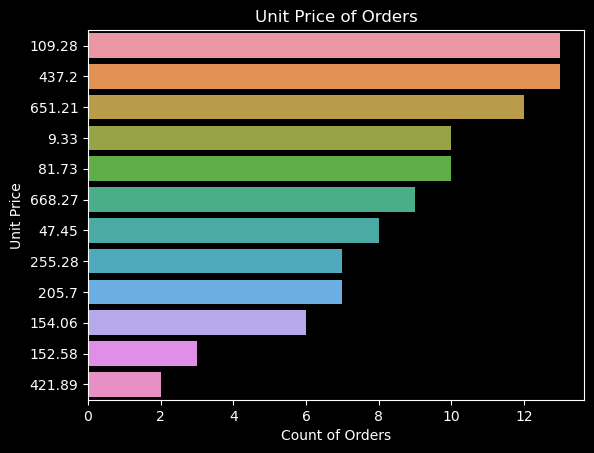

In [106]:
# Unit Price column count plot
sns.countplot(data= amazon, y= 'Unit Price', order = amazon['Unit Price'].value_counts().index)
plt.title('Unit Price of Orders')
plt.xlabel('Count of Orders')
plt.show()

- Since we have only 12 different unit prices and unit cost, hence we can use them as categorical column

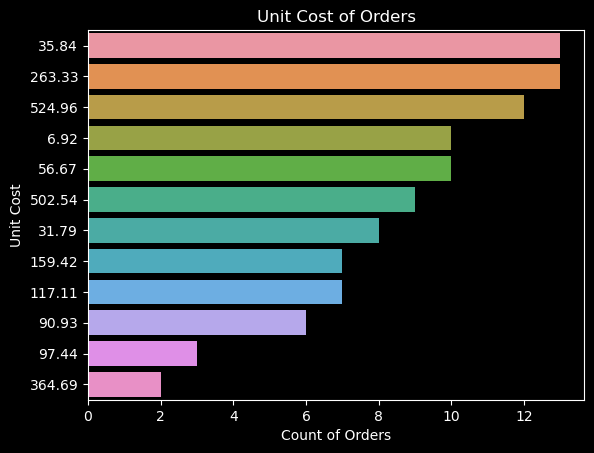

In [116]:
# Unit Price column count plot
sns.countplot(data= amazon, y= 'Unit Cost', order = amazon['Unit Cost'].value_counts().index)
plt.title('Unit Cost of Orders')
plt.xlabel('Count of Orders')
plt.show()

- There is no particular insight from above graph. Unit cost can be high or low and still have more or less count of orders.
- Clearly unit price does not influence no. of orders

# Bivariate Analysis

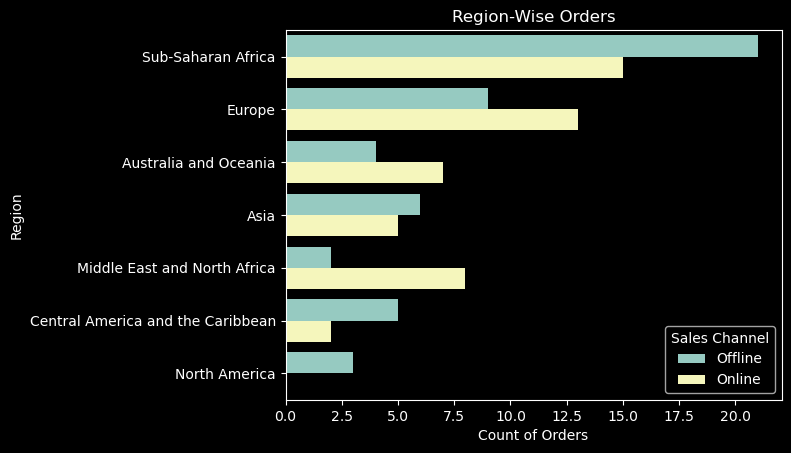

In [123]:
# Item Type column count plot
sns.countplot(data= amazon, y= 'Region', hue = 'Sales Channel', order = amazon['Region'].value_counts().index)
plt.title('Region-Wise Orders')
plt.xlabel('Count of Orders')
plt.show()

- In sub-Saharan africa region, most orders are through offline sales channel and it has most online orders as well amongst all other regions.
- In North America, there are no online orders.
- In Middle East and North Africa Region, offline orders are least.

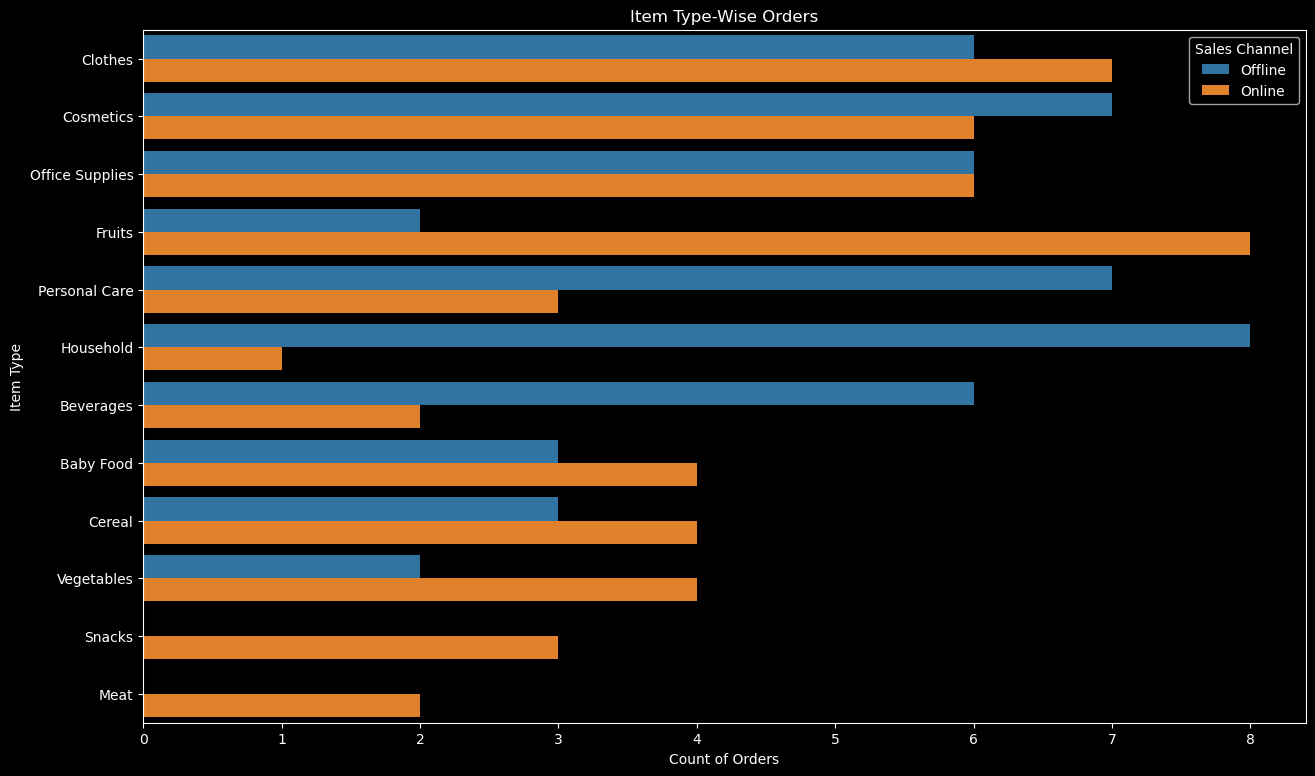

In [220]:
# Item Type column count plot
plt.figure(figsize=(15,9))
sns.countplot(data= amazon, y= 'Item Type', hue='Sales Channel', order=amazon['Item Type'].value_counts().index, palette='tab10')
plt.title('Item Type-Wise Orders')
plt.xlabel('Count of Orders')
plt.show()

- Most sold item through online sales channel is fruit followed by Clothes.
- Most sold item through offline sales channel is household products followed by cosmetics and personal care products. 
- Least sold item through online is household products.
- There are zero sales of Snacks and meat through offline channel.

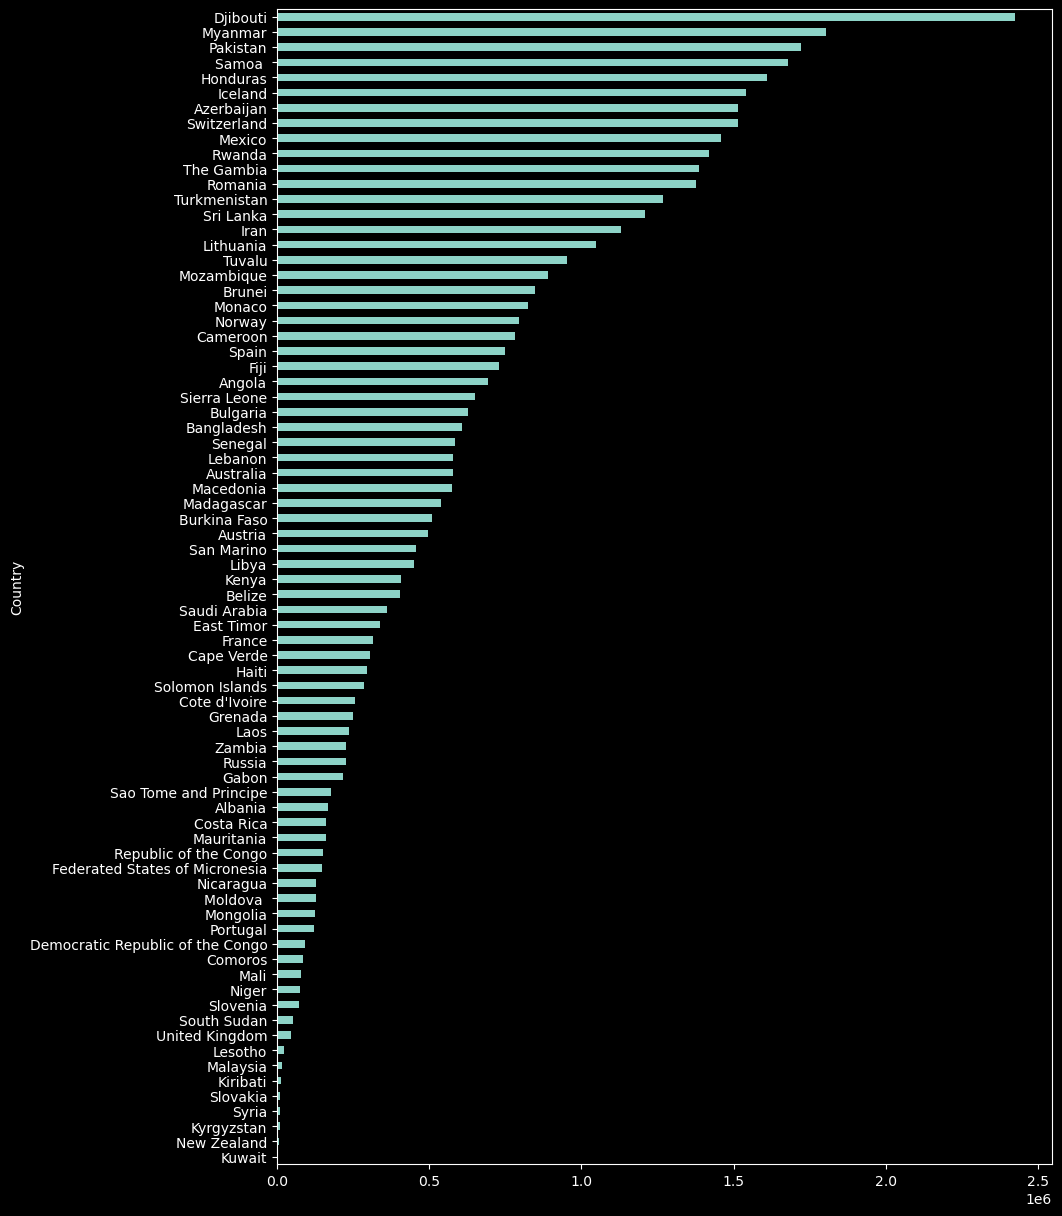

In [298]:
# country wise profits
plt.figure(figsize=(10,15))
amazon.groupby('Country')['Total Profit'].sum().sort_values().plot.barh()
plt.show()

- It's clearly visible that highest profit is coming from the country `Djibouti` which is in the Sub-Saharan African Region.
- Least profits are from countries like Kuwait, New Zealand, Kyrgyzstan, Syria, Slovakia, Kiribati. 

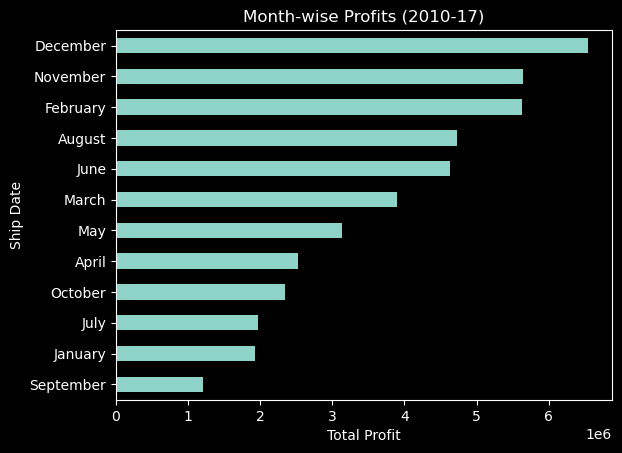

In [414]:
# month-wise profits for all years combined
amazon.groupby(amazon['Ship Date'].dt.strftime('%B'))['Total Profit'].sum().sort_values().plot.barh() 
plt.title("Month-wise Profits (2010-17)")
plt.xlabel("Total Profit")
plt.show()

- After summing up the profits for all the years month-wise, December is at the top with highest profits of more than 6 million followed by November and February.
- Least is in the month of September

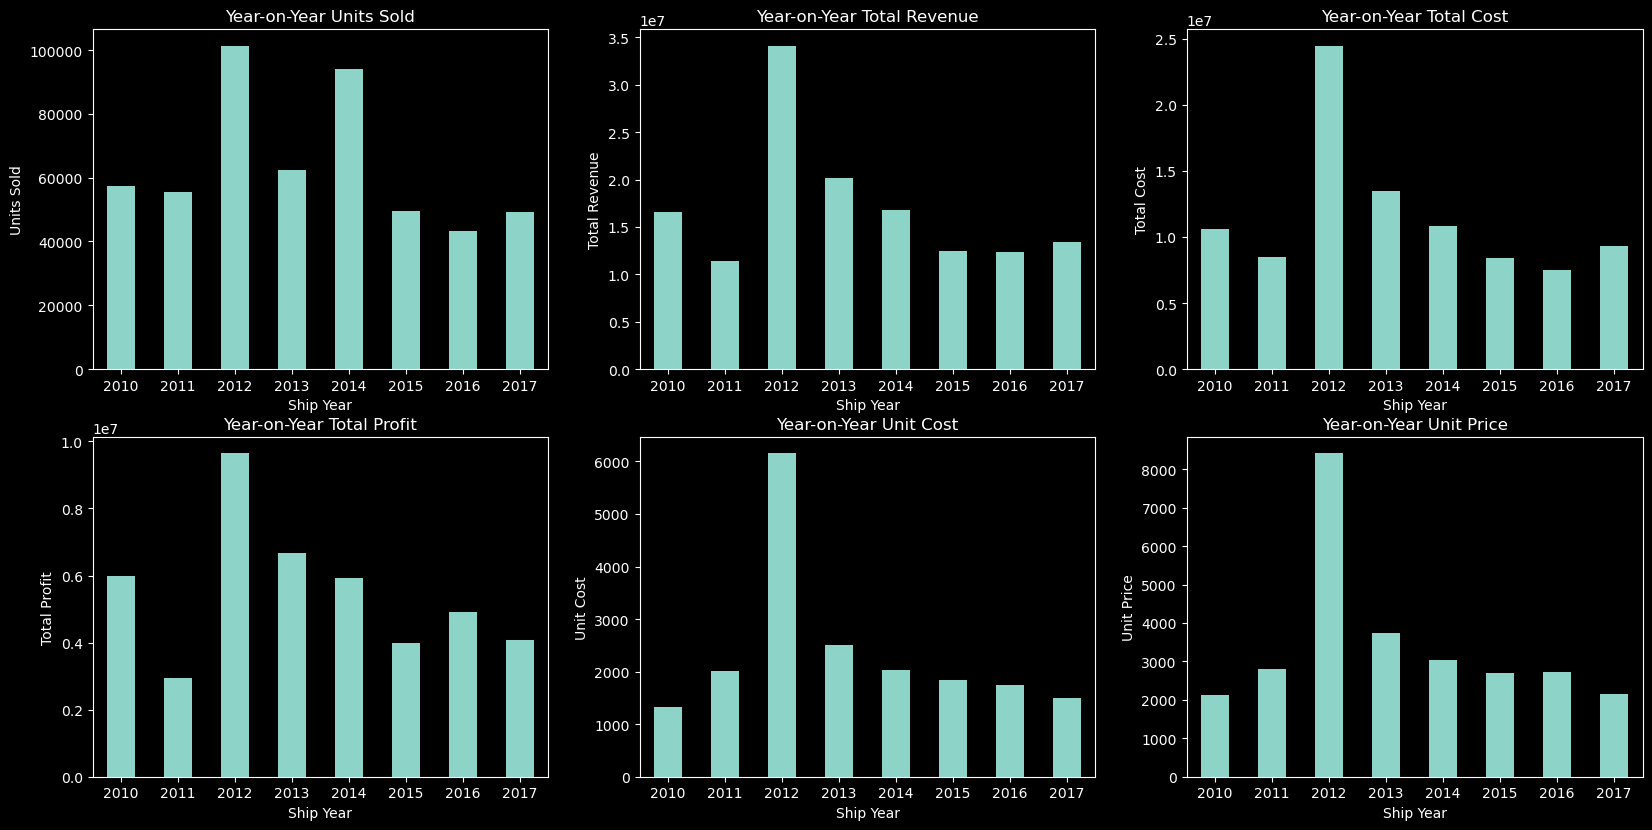

In [431]:
# year-on-year profit
i = 1
plt.figure(figsize=(20,15))
for variable in num_col:
    plt.subplot(3,3,i)
    i+=1
    amazon.groupby(amazon['Ship Date'].dt.year)[variable].sum().plot.bar() 
    plt.title("Year-on-Year {}".format(variable))
    plt.ylabel(variable)
    plt.xlabel("Ship Year")
    plt.xticks(rotation=0)
plt.show()

## Insight
- In our sample dataset of amazon products and orders, if we look at year on year growth for different variables, we can clearly see that for the year 2012, units sold, total revenue, total cost, total profit, unit cost, and unit price, all were highest and hence we can say it was the best year.
- But after 2012, there is a downtrend observed in profits, and revenue. 
- Suddenly in 2014, there was again a huge rise in units sold, almost equal to that in 2012, but despite that increase in sales, there was no increase in profits or revenue or any other variable compared to previous year. 

In [445]:
amazon.groupby('Region')[variable].sum().sort_values(ascending = False).index

Index(['Sub-Saharan Africa', 'Europe', 'Asia', 'Australia and Oceania',
       'Middle East and North Africa', 'Central America and the Caribbean',
       'North America'],
      dtype='object', name='Region')

SSA : Sub-Saharan Africa
EUR : Europe
AUS & OCE : Australia and Oceania
ASIA : Asia
ME & NA : Middle East and North Africa
CA & CAR : Central America and the Caribbean
NA : North America


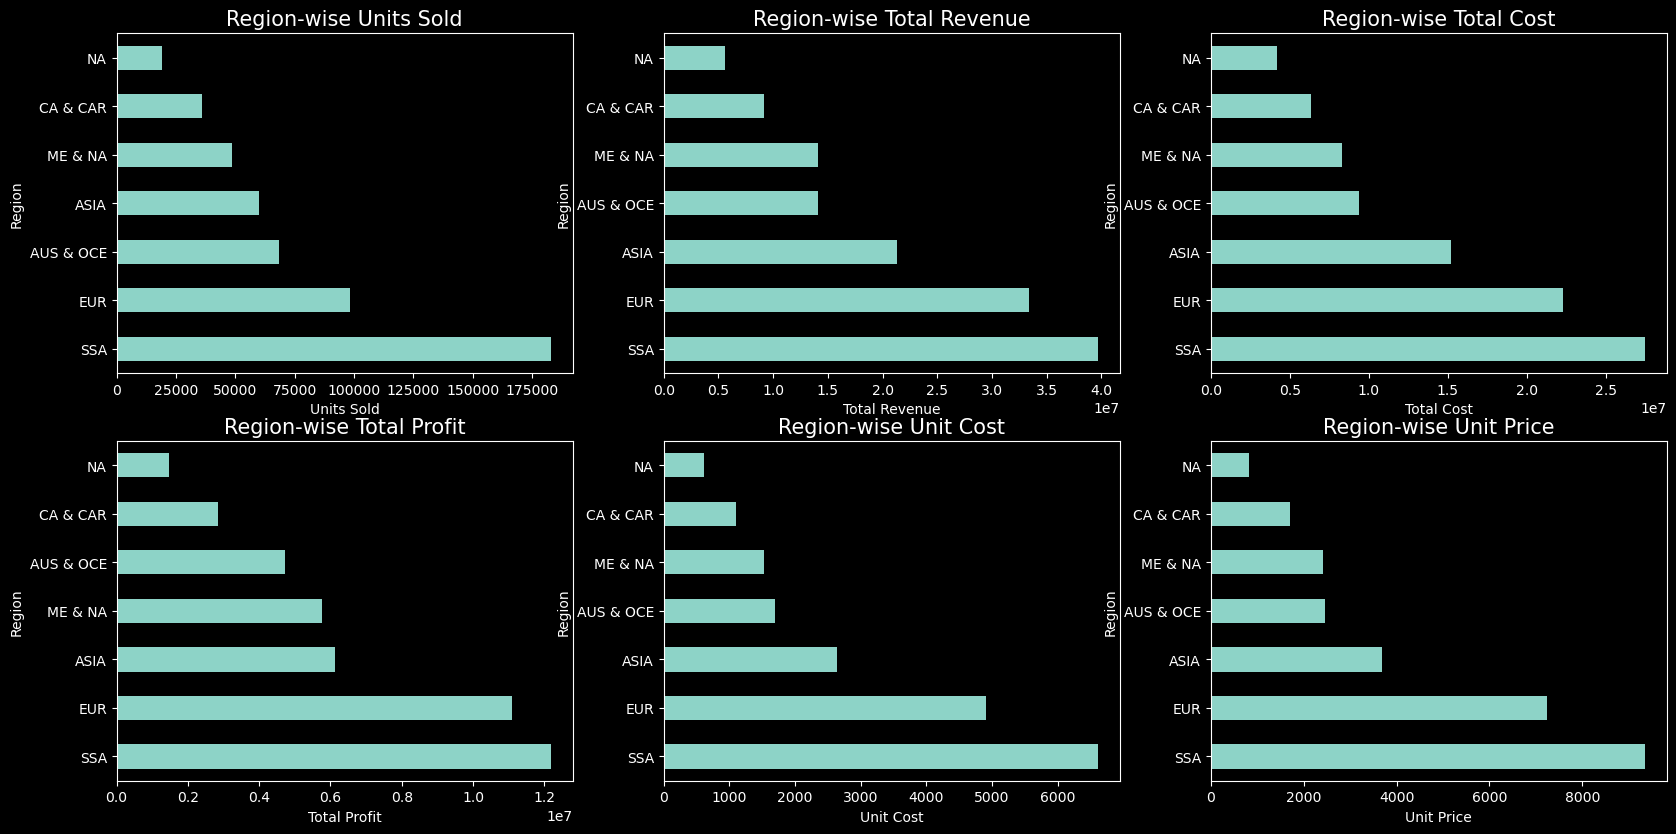

In [447]:
# plotting Region wise data
region = {}
for i,j in zip(['SSA', 'EUR', 'AUS & OCE', 'ASIA', 'ME & NA', 'CA & CAR', 'NA'], 
               amazon.Region.value_counts().index):
    region[j]=i
for key in region:
    print(region[key], ':', key)
i = 1
plt.figure(figsize=(20,15))
for variable in num_col:
    plt.subplot(3,3,i)
    i+=1
    curr = amazon.groupby('Region')[variable].sum().sort_values(ascending = False)
    ax = curr.plot(kind='barh')
    plt.xlabel(variable)
    plt.title('Region-wise {}'.format(variable), fontsize=15)
    ax.set_yticklabels([region[key] for key in curr.index])
plt.show()

### Insights:
- Sub-Saharan African region is having the most sales, revenue and profit. 
- North America region is having the least number of Units sold, and hence generates least revenue and also least profit.

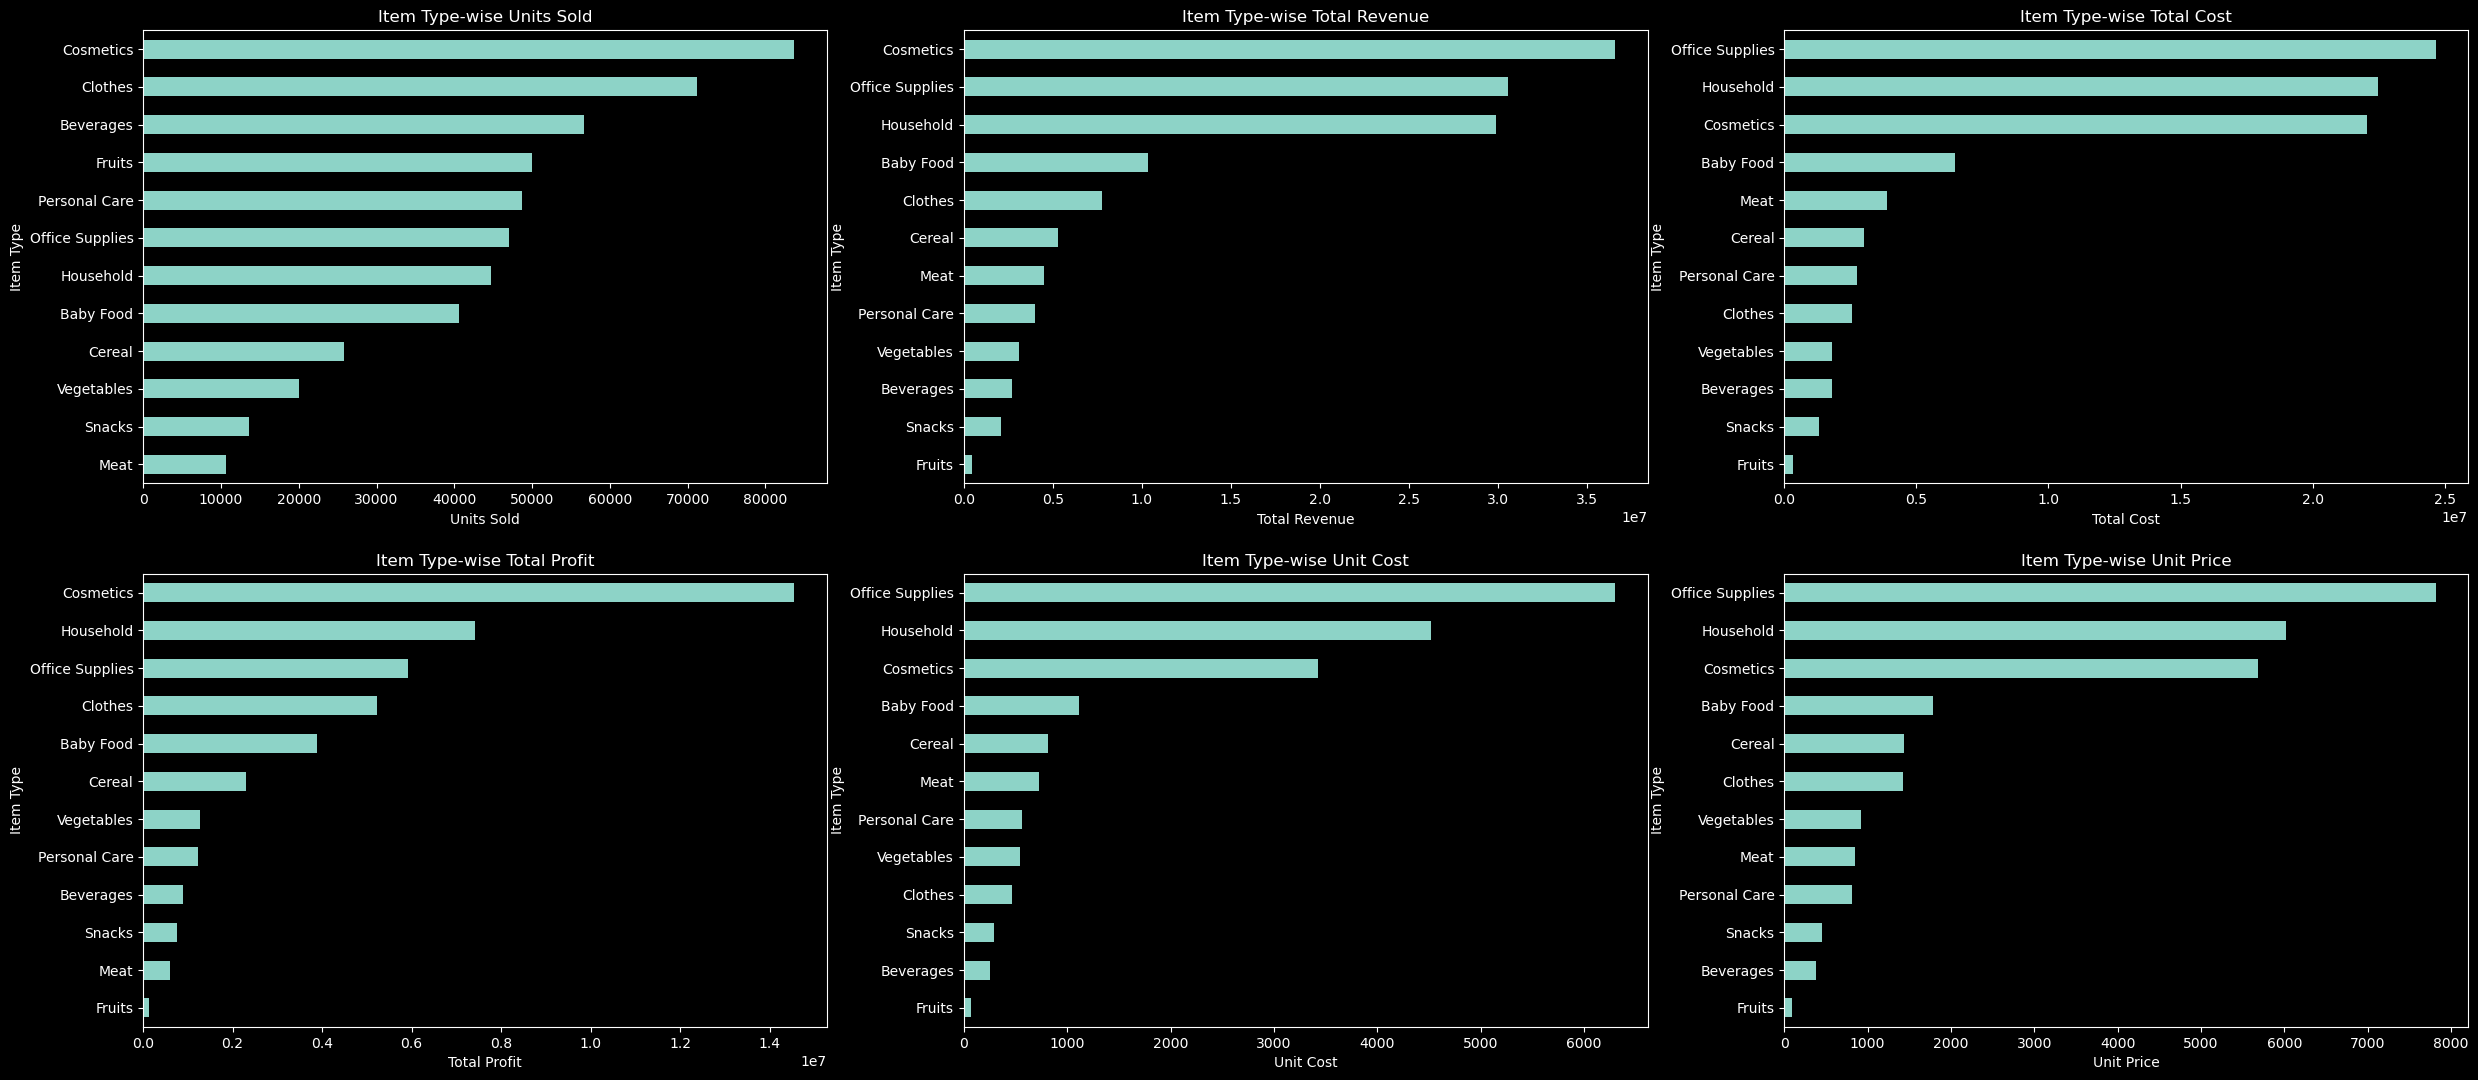

In [448]:
# plotting Item-type wise data
i = 1
plt.figure(figsize=(30,20))
for variable in num_col:
    plt.subplot(3,3,i)
    i+=1
    amazon.groupby('Item Type')[variable].sum().sort_values().plot(kind='barh')
    plt.xlabel(variable)
    plt.title('Item Type-wise {}'.format(variable))
plt.show() 

## Insights 
- Cosmetics have been sold the most, generating the highest revenue and profit with not the highest total cost as well among all other items.
- Fruits sales are the third highest, but since the cost and unit price is lowest, it generates least profit and revenue among all items. 
- Least sales is for meat.

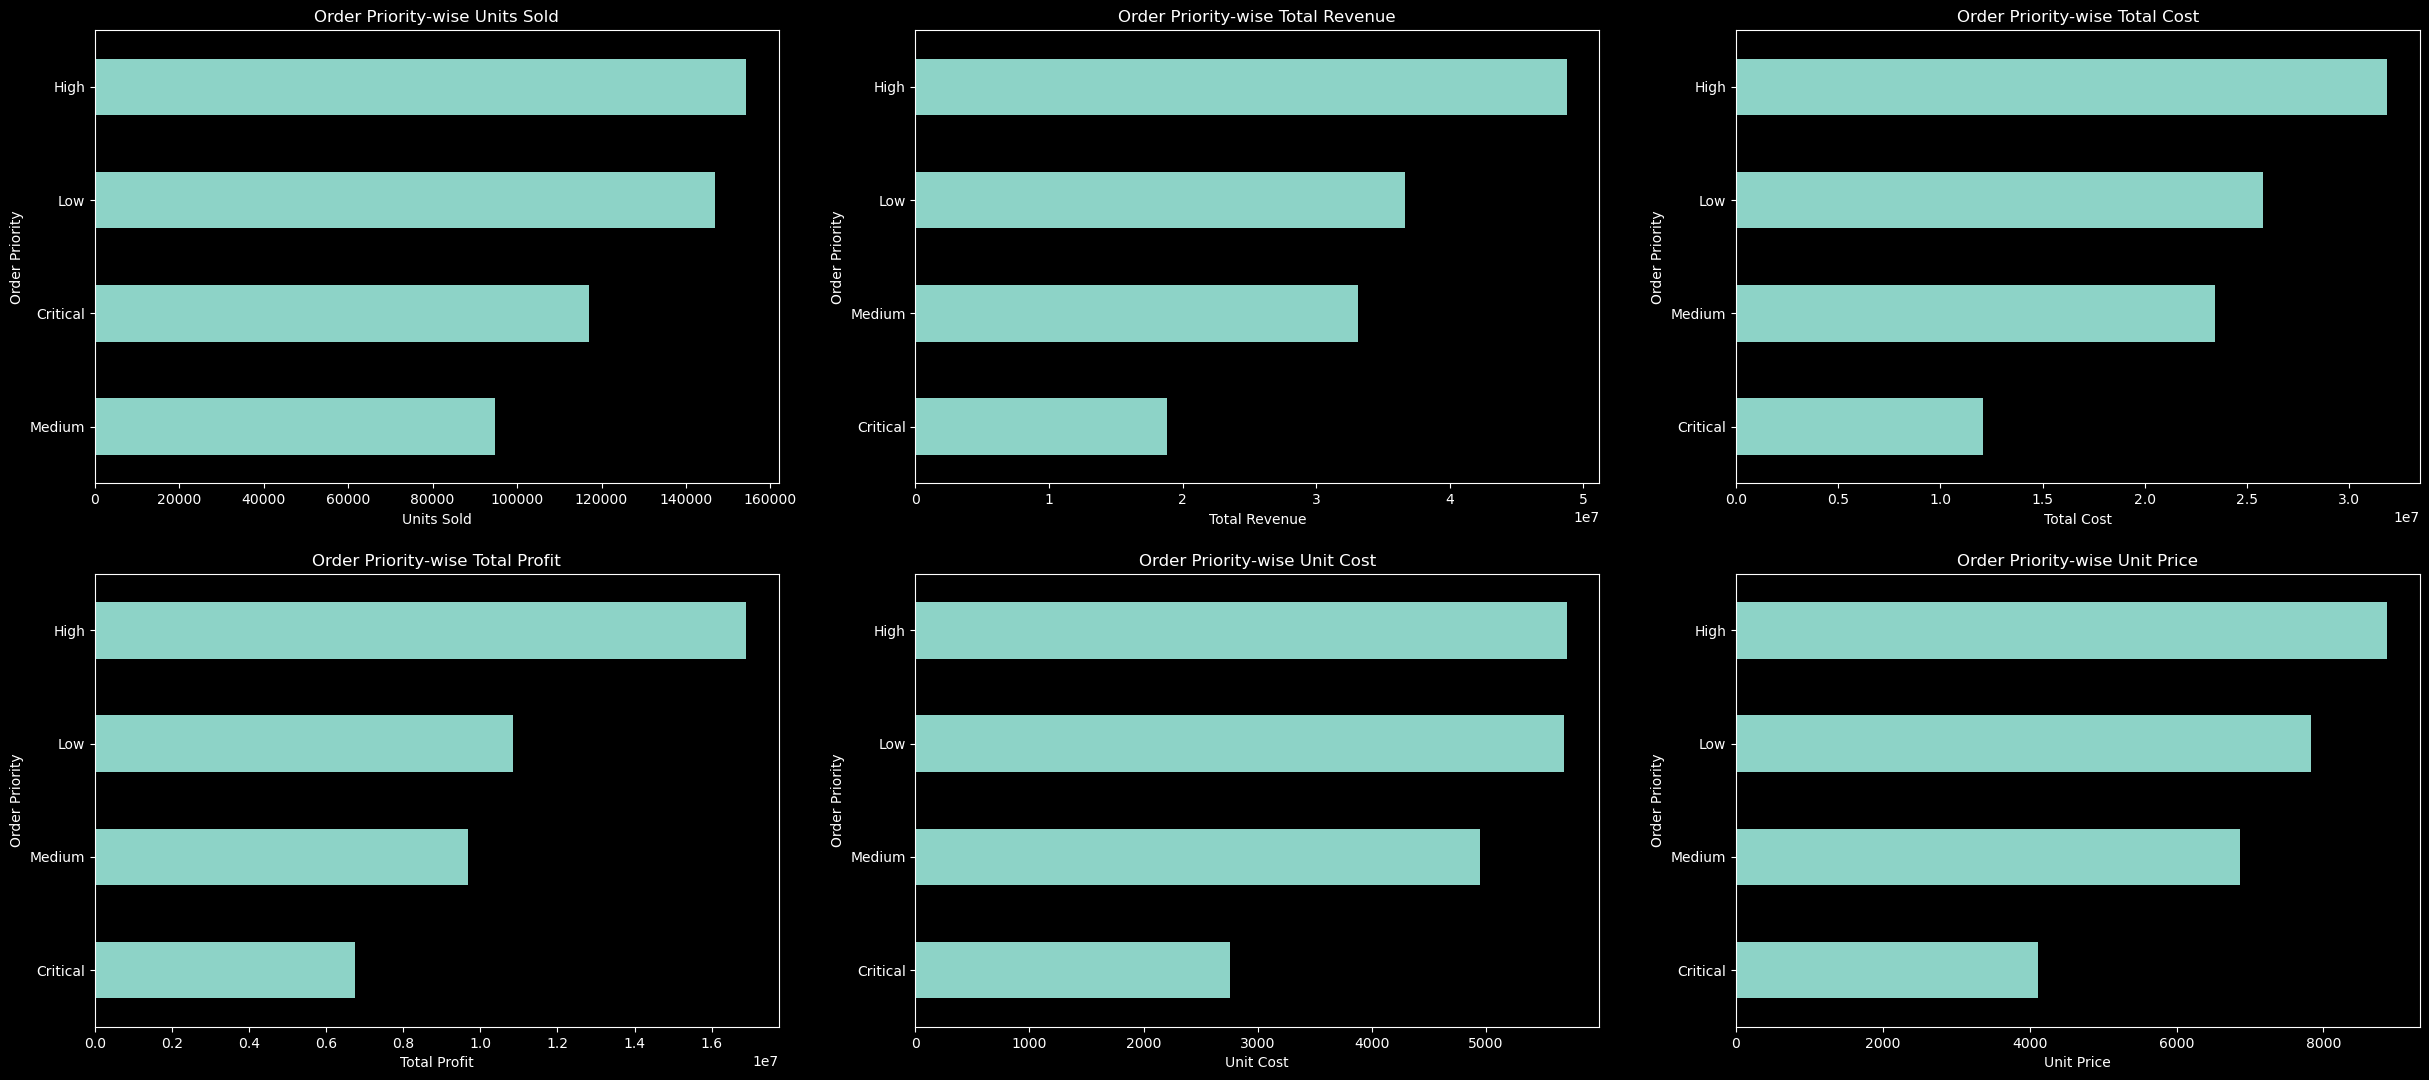

In [455]:
# plotting Order Priority wise data
order = {}
for i, j in zip(['High', 'Low', 'Critical', 'Medium'], amazon['Order Priority'].value_counts().index):
    order[j] = i 
i = 1
plt.figure(figsize=(30,20))
for variable in num_col:
    plt.subplot(3,3,i)
    i+=1
    curr = amazon.groupby('Order Priority')[variable].sum().sort_values()
    ax = curr.plot(kind='barh')
    plt.xlabel(variable)
    plt.title('Order Priority-wise {}'.format(variable))
    ax.set_yticklabels([order[i] for i in curr.index])
plt.show()

## Insight
- We have more 'High' priority orders and less 'critical' priority orders in general.
- Most profit has been generated from high priority orders.
- Least profit has been realised from critical priority orders.


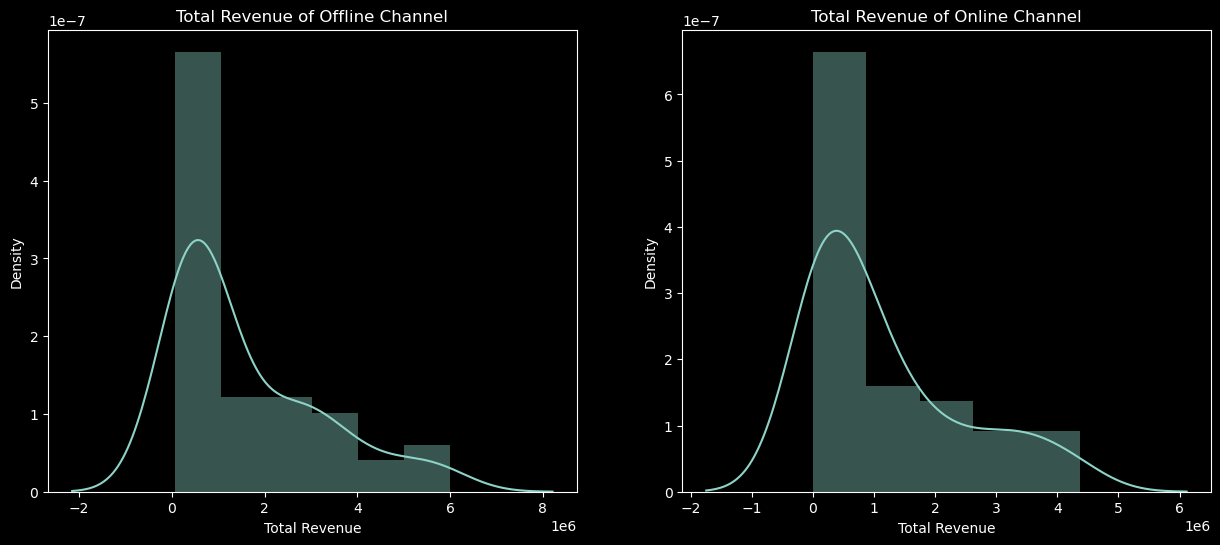

In [460]:
# analysing total revenue for offline and online channel 
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(amazon['Total Revenue'][amazon['Sales Channel']=='Offline'])
plt.title("Total Revenue of Offline Channel")

plt.subplot(1,2,2)
sns.distplot(amazon['Total Revenue'][amazon['Sales Channel']=='Online']).set_title('Total Revenue of Online Channel')
plt.show()

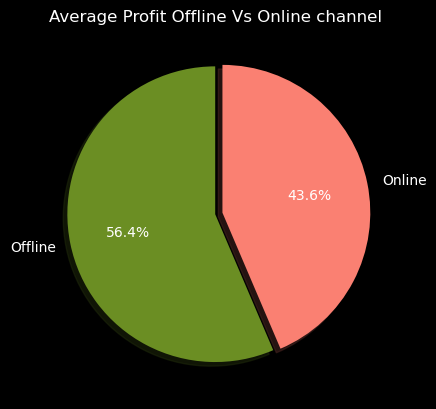

In [257]:
#plotting pie chart to see avg profit for offline and online channel
amazon.groupby("Sales Channel")['Total Profit'].mean().plot.pie(labels = ['Offline', 'Online'], autopct="%1.1f%%",
                                                                   colors = ['olivedrab', 'salmon'], shadow=True, explode=[0,0.05],
                                                                   startangle=90)
plt.title("Average Profit Offline Vs Online channel")
plt.ylabel("")
plt.show()

## Correlation between Numerical Variables 

/Users/deveshparashar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


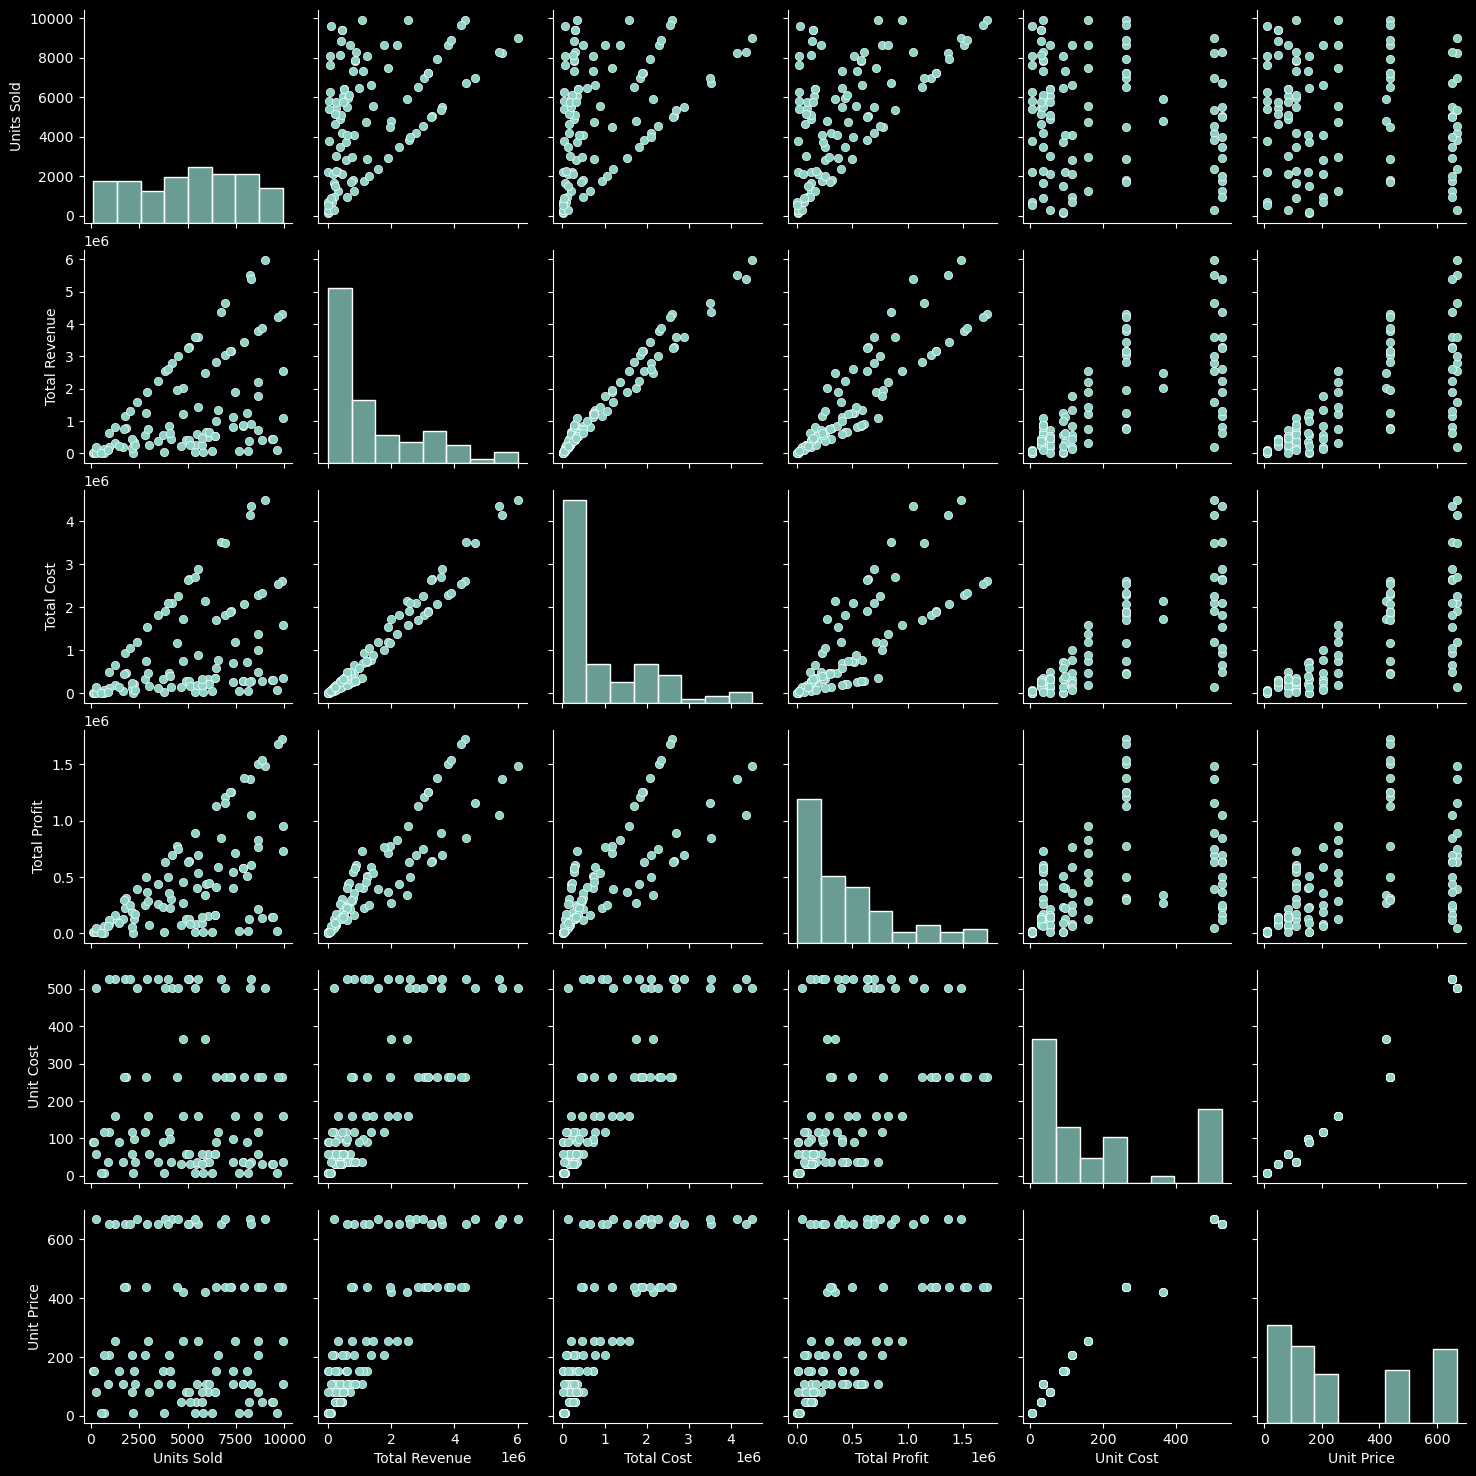

In [246]:
sns.pairplot(data = amazon[num_col])
plt.show()

## Insight 
- To be given
- to be given

# Multivariate Analysis

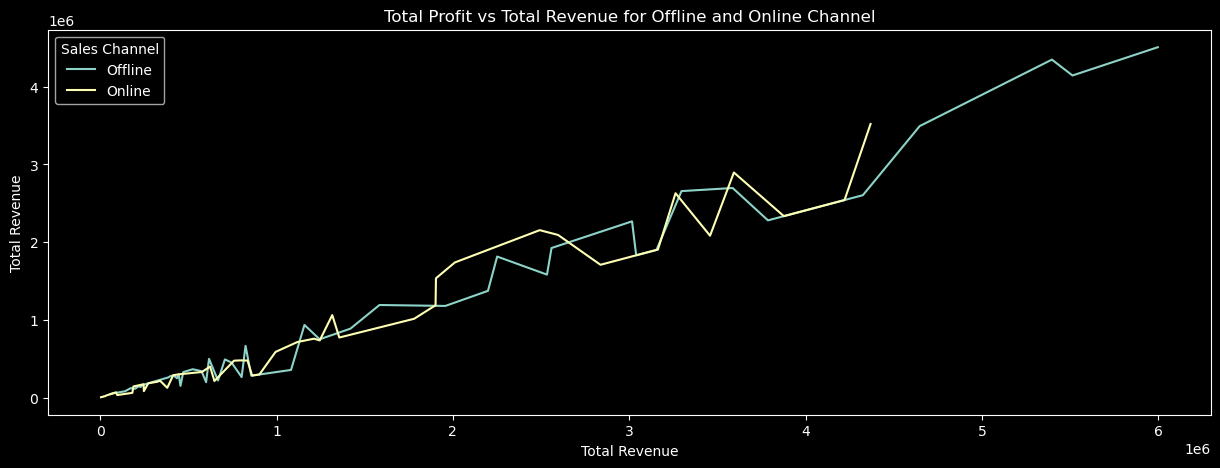

In [263]:
#let's do multivariate on age and income of defaulter and non-defaulter
plt.figure(figsize=(15,5))
sns.lineplot(data = amazon, x='Total Revenue', y='Total Cost', hue= amazon['Sales Channel'])
plt.title("Total Profit vs Total Revenue for Offline and Online Channel")
plt.ylabel("Total Revenue")
plt.show() 

## Insight
- to be given

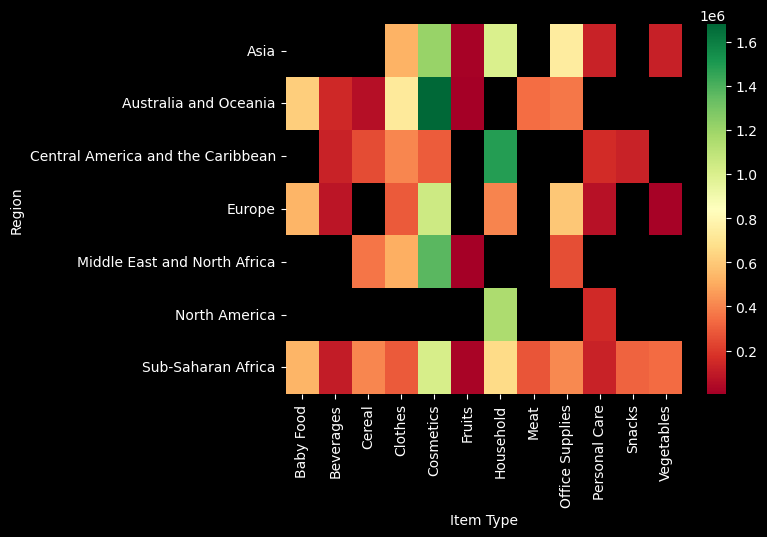

In [275]:
# Region and item wise average profit heatmap
pivot = pd.pivot_table(data=amazon, index='Region', columns='Item Type', values='Total Profit', aggfunc=np.mean)
sns.heatmap(pivot, cmap='RdYlGn')
plt.show()

## Insight
- to be given

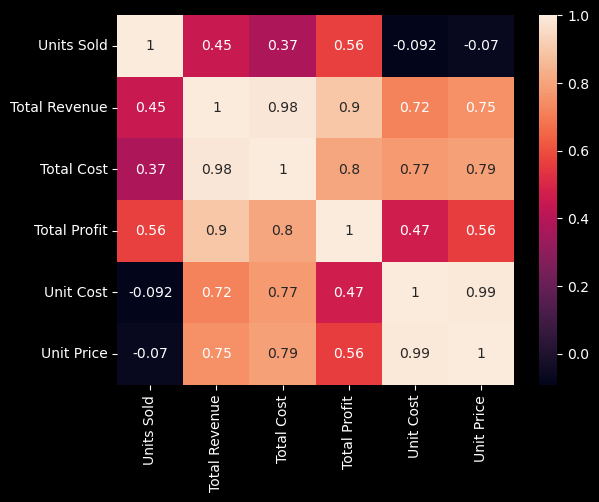

In [302]:
# correlation heatmap
sns.heatmap(amazon[num_col].corr(), annot=True)
plt.show()

## Insight 
- to be given